In [1]:
# 이미지 데이터 로딩
from tensorflow.keras.datasets import mnist # module.load_data()
(train_images, train_labels),(test_images, test_labels)= mnist.load_data()

In [2]:
# 첫번째 이미지
print(train_labels[0]) # 첫번째이미지의 답 : 5
train_images[0] # 5라는 숫자 이미지

5


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
      layers.Dense(512, activation='relu')
    , layers.Dense(10, activation='relu')
    , layers.Dense(10)
])

In [4]:
# loss function(오차 구하는 함수), optimizer(역전파), metric(평가지표)
model.compile(
    optimizer='adam'
    , loss='sparse_categorical_crossentropy'
    , metrics=['accuracy']
)


In [5]:
# 데이터 준비(60000,28,28) : 28x28 2차원인데 => 1차원 변경
train_images = train_images.reshape(60000,28*28)
# 0 ~ 1 사이값으로 변환
train_images = train_images.astype('float32')/255

# 테스트 데이터 동일처리
test_images = test_images.reshape(10000,28*28)
test_images = test_images.astype('float32')/255

In [6]:
model.fit(
      train_images       # 학습데이터
    , train_labels      # 학습데이터 답
    , epochs=5          # 전체데이터에 대한 반복 학습 횟수
    , batch_size=128    # 한번 학습시 사용할 데이터 포인트 개수
)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 2.4737 - accuracy: 0.1097
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 2.3025 - accuracy: 0.0992
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 2.3024 - accuracy: 0.0992
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 2.3025 - accuracy: 0.0992
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 2.3025 - accuracy: 0.0993


In [5]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])


model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255


model.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.2561 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1034 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0679 - accuracy: 0.9804
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0491 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0368 - accuracy: 0.9892


In [6]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


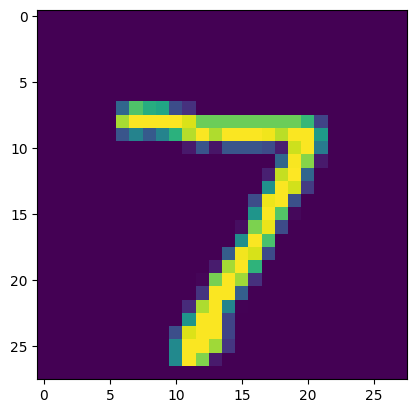

In [8]:
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images[0])
plt.show()


In [ ]:
predictions=model.predict(test_images)
print(f'테스트이미지 예측값 : {predictions[1].argmax()}')
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images[1])
plt.show()

In [13]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images,test_labels)=mnist.load_data()

In [16]:
# 학습 이미지의 차원 확인
train_images.ndim, train_images.shape

(3, (60000, 28, 28))

In [17]:
my_slice=train_images[10:100]
my_slice.shape

(90, 28, 28)

In [18]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x


In [19]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x


In [22]:
import time
import numpy as np

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.6f} s".format(time.time() - t0))


걸린 시간: 0.004999 s


In [23]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))


걸린 시간: 1.62 s


In [27]:
import tensorflow as tf
x=tf.Variable(0.)
type(x)
with tf.GradientTape() as tapd:
    y=2*x+3
    
grad_of_y_wrt_x=tapd.gradient(y,x)
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [28]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images,test_images)=mnist.load_data()

In [31]:
## NN 생성 = 계산그래프
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(512,activation='relu')
    ,layers.Dense(10,activation='softmax')   
])
model.compile(
    optimizer='rmsprop'
    ,loss='sparse_categorical_crossentropy'
    , metrics=['accuracy']
)

# 데이터 정규화
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255


model.fit(
    train_images
    ,train_labels
    , epochs=5
    , batch_size=128
)
model.summary()

ValueError: cannot reshape array of size 10000 into shape (10000,784)

In [1]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]


In [2]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights


In [3]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4


In [4]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels


In [5]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss


In [6]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)


In [7]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")



In [8]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)


에포크 0
0번째 배치 손실: 6.28
100번째 배치 손실: 2.23
200번째 배치 손실: 2.19
300번째 배치 손실: 2.08
400번째 배치 손실: 2.21
에포크 1
0번째 배치 손실: 1.90
100번째 배치 손실: 1.87
200번째 배치 손실: 1.81
300번째 배치 손실: 1.69
400번째 배치 손실: 1.82
에포크 2
0번째 배치 손실: 1.57
100번째 배치 손실: 1.58
200번째 배치 손실: 1.49
300번째 배치 손실: 1.41
400번째 배치 손실: 1.50
에포크 3
0번째 배치 손실: 1.32
100번째 배치 손실: 1.34
200번째 배치 손실: 1.23
300번째 배치 손실: 1.20
400번째 배치 손실: 1.27
에포크 4
0번째 배치 손실: 1.13
100번째 배치 손실: 1.16
200번째 배치 손실: 1.04
300번째 배치 손실: 1.04
400번째 배치 손실: 1.10
에포크 5
0번째 배치 손실: 0.98
100번째 배치 손실: 1.02
200번째 배치 손실: 0.90
300번째 배치 손실: 0.92
400번째 배치 손실: 0.99
에포크 6
0번째 배치 손실: 0.87
100번째 배치 손실: 0.91
200번째 배치 손실: 0.80
300번째 배치 손실: 0.83
400번째 배치 손실: 0.90
에포크 7
0번째 배치 손실: 0.79
100번째 배치 손실: 0.83
200번째 배치 손실: 0.72
300번째 배치 손실: 0.76
400번째 배치 손실: 0.83
에포크 8
0번째 배치 손실: 0.73
100번째 배치 손실: 0.76
200번째 배치 손실: 0.66
300번째 배치 손실: 0.71
400번째 배치 손실: 0.78
에포크 9
0번째 배치 손실: 0.68
100번째 배치 손실: 0.70
200번째 배치 손실: 0.61
300번째 배치 손실: 0.67
400번째 배치 손실: 0.74


In [12]:
import numpy as np
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.82
